# 1. EDA:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.dates as mpl_dates

#The raw dataset
df = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])
df = df.sort_values(['UNIXTime'], ascending = [True])

/var/folders/vl/4dfnvm4n2lzg3h22r3bfl4km0000gp/T/ipykernel_56241/3916450928.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])


In [47]:
#Cleaning the data into a new dataset with non-timestamp formats
df_clean = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])
df_clean = df_clean.sort_values(['UNIXTime'], ascending = [True])

df_clean = df_clean.drop(['Data','Time','TimeSunRise','TimeSunSet'], axis=1)

df_clean

/var/folders/vl/4dfnvm4n2lzg3h22r3bfl4km0000gp/T/ipykernel_56241/4109088275.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean = pd.read_csv('data/SolarPredictionFixed2.csv', parse_dates=["Data"])


,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
7679,1472724008,2.58,51.0,30.43,103.0,77.27,11.25
7678,1472724310,2.83,51.0,30.43,103.0,153.44,9.00
7677,1472725206,2.16,51.0,30.43,103.0,142.04,7.87
7676,1472725505,2.21,51.0,30.43,103.0,144.12,18.00
7675,1472725809,2.25,51.0,30.43,103.0,67.42,11.25
...,...,...,...,...,...,...,...
25052,1483263302,1.22,41.0,30.34,83.0,238.94,6.75
25051,1483263601,1.21,41.0,30.34,82.0,236.79,5.62
25050,1483263904,1.21,42.0,30.34,81.0,218.28,7.87
25049,1483264203,1.19,41.0,30.34,80.0,215.23,7.87


In [16]:
#Features

print("Head:", "\n", df.head(), "\n")
#print("Shape:", df.shape, "\n")
#print("Describe:", "\n", df.describe(), "\n")
#print("Datatypes:", "\n", df.dtypes, "\n")
print("Start and stop dates:", df["Data"].min())
print(df["Data"].max())
print("Length:", df["Data"].max()-df["Data"].min())

Head: 
         UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
7679  1472724008 2016-09-01  00:00:08       2.58         51.0     30.43   
7678  1472724310 2016-09-01  00:05:10       2.83         51.0     30.43   
7677  1472725206 2016-09-01  00:20:06       2.16         51.0     30.43   
7676  1472725505 2016-09-01  00:25:05       2.21         51.0     30.43   
7675  1472725809 2016-09-01  00:30:09       2.25         51.0     30.43   

      Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
7679     103.0                   77.27  11.25    06:07:00   18:38:00  
7678     103.0                  153.44   9.00    06:07:00   18:38:00  
7677     103.0                  142.04   7.87    06:07:00   18:38:00  
7676     103.0                  144.12  18.00    06:07:00   18:38:00  
7675     103.0                   67.42  11.25    06:07:00   18:38:00   

Start and stop dates: 2016-09-01 00:00:00
2016-12-31 00:00:00
Length: 121 days 00:00:00


In [24]:
#Make a new df only September
#df_sept = df.loc[(df["Data"] >= pd.to_datetime("2016-09-01")) & (df["Data"] <= pd.to_datetime("2016-09-29"))]
#print(df_sept)

#Create a new df1, which is df indexed by date
df1 = df.set_index("Data")
print(df1)

print("Mean temp:", df1["Temperature"].mean())

mean_temp_months = df1["Temperature"].resample('M').mean()
mean_temp_weeks = df1["Temperature"].resample('W').mean()
mean_radiation_months = df1["Radiation"].resample('M').mean()
mean_radiation_weeks = df1["Radiation"].resample('W').mean()
mean_radiation_days = df1["Radiation"].resample('D').mean()

              UNIXTime      Time  Radiation  Temperature  Pressure  Humidity  \
Data                                                                           
2016-09-01  1472724008  00:00:08       2.58         51.0     30.43     103.0   
2016-09-01  1472724310  00:05:10       2.83         51.0     30.43     103.0   
2016-09-01  1472725206  00:20:06       2.16         51.0     30.43     103.0   
2016-09-01  1472725505  00:25:05       2.21         51.0     30.43     103.0   
2016-09-01  1472725809  00:30:09       2.25         51.0     30.43     103.0   
...                ...       ...        ...          ...       ...       ...   
2016-12-31  1483263302  23:35:02       1.22         41.0     30.34      83.0   
2016-12-31  1483263601  23:40:01       1.21         41.0     30.34      82.0   
2016-12-31  1483263904  23:45:04       1.21         42.0     30.34      81.0   
2016-12-31  1483264203  23:50:03       1.19         41.0     30.34      80.0   
2016-12-31  1483264501  23:55:01       1

<function matplotlib.pyplot.show(close=None, block=None)>

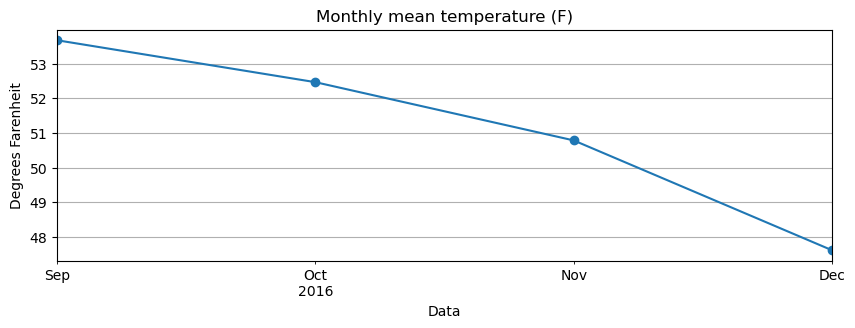

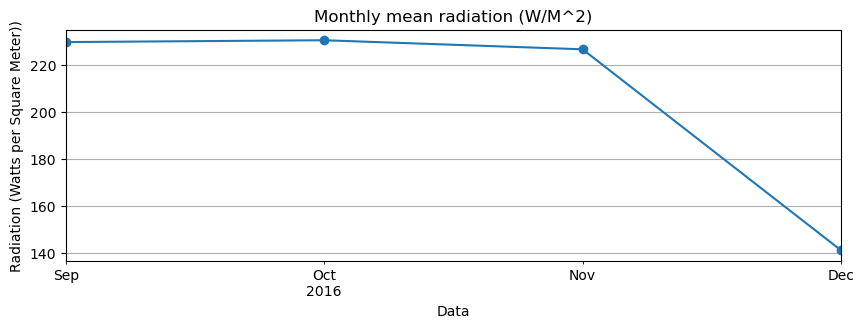

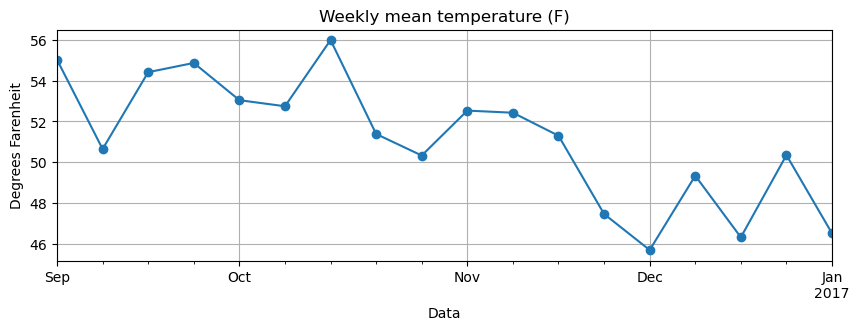

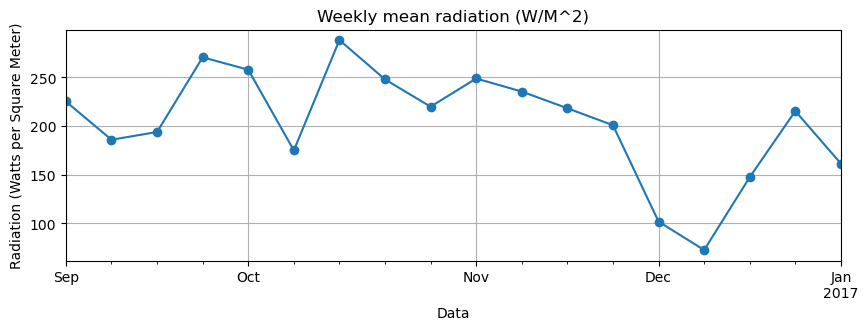

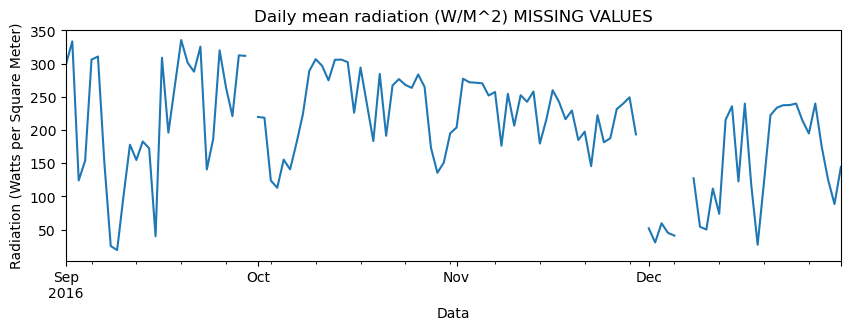

In [3]:
#Monthly mean temp plot
plt.figure(figsize=(10,3))
plt.title("Monthly mean temperature (F)")
plt.ylabel('Degrees Farenheit')
mean_temp_months.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Monthly mean radiation plot
plt.figure(figsize=(10,3))
plt.title("Monthly mean radiation (W/M^2)")
plt.ylabel('Radiation (Watts per Square Meter))')
mean_radiation_months.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show


#Weekly mean temp hist
plt.figure(figsize=(10,3))
plt.title("Weekly mean temperature (F)")
plt.ylabel('Degrees Farenheit')
mean_temp_weeks.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Weekly mean radiation hist
plt.figure(figsize=(10,3))
plt.title("Weekly mean radiation (W/M^2)")
plt.ylabel('Radiation (Watts per Square Meter)')
mean_radiation_weeks.plot(marker='o', linestyle='-')
plt.grid(True)
plt.show

#Daily mean radiation hist
plt.figure(figsize=(10,3))
plt.title("Daily mean radiation (W/M^2) MISSING VALUES")
plt.ylabel('Radiation (Watts per Square Meter)')
mean_radiation_days.plot(linestyle='-')
plt.show

In [4]:
#The missing values
print(mean_radiation_days["2016-9-30"])
print(mean_radiation_days["2016-11-30"])
print(mean_radiation_days["2016-12-6"])
print(mean_radiation_days["2016-12-7"])

nan
nan
nan
nan


/var/folders/vl/4dfnvm4n2lzg3h22r3bfl4km0000gp/T/ipykernel_56241/2924563038.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1_hour_of_day.index = pd.to_datetime(df1_hour_of_day.index)


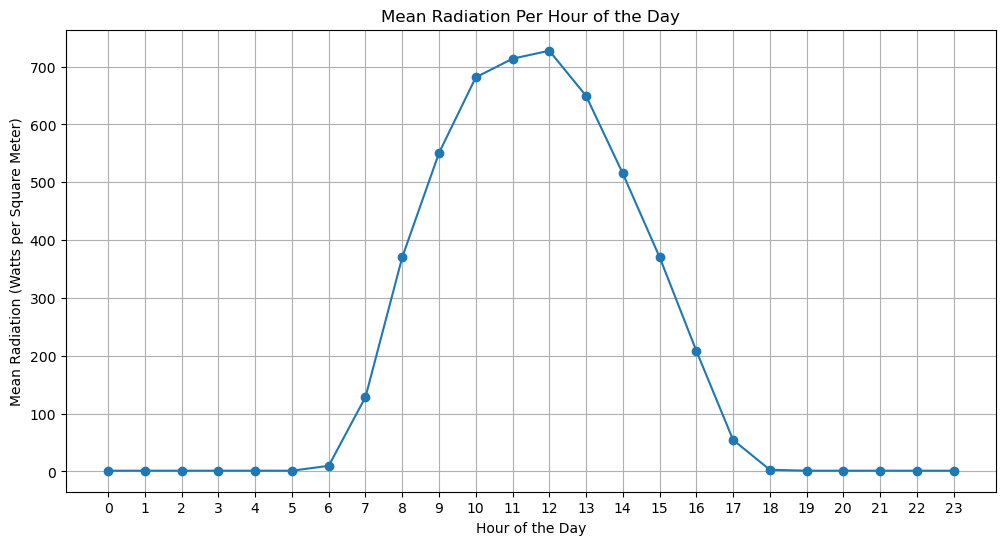

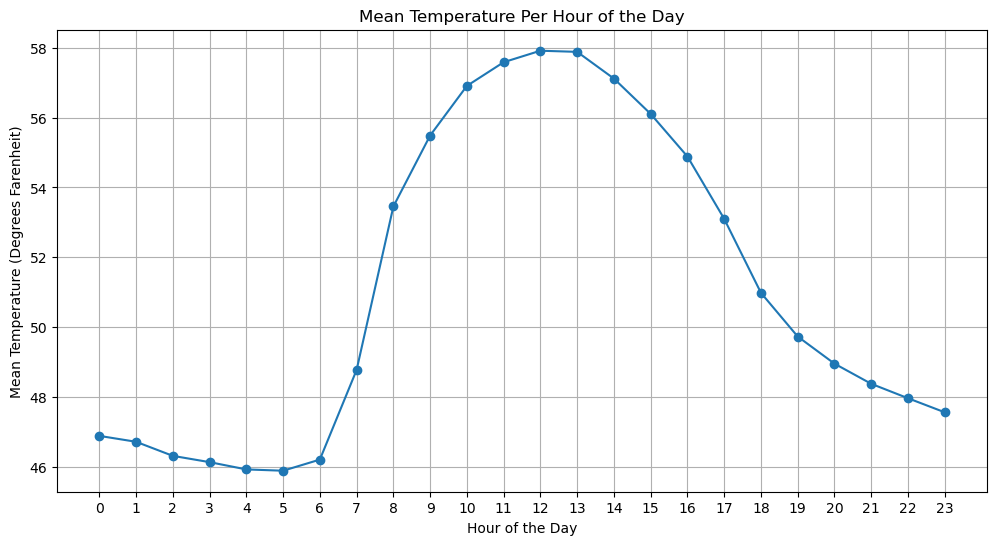

In [5]:
#Index by Hour of day
df1_hour_of_day = df.set_index("Time")

#Set to datetime
df1_hour_of_day.index = pd.to_datetime(df1_hour_of_day.index)

#Radiation Hourly means
hourly_means_rad = df1_hour_of_day["Radiation"].resample('H').mean()

#Temperature Hourly means
hourly_means_temp = df1_hour_of_day["Temperature"].resample('H').mean()


#Mean Radiation by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_means_rad.index.hour, hourly_means_rad, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Radiation (Watts per Square Meter)')
plt.title('Mean Radiation Per Hour of the Day')
plt.xticks(np.arange(24))
plt.grid(True)
plt.show()

#Mean Temperature by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_means_temp.index.hour, hourly_means_temp, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Temperature (Degrees Farenheit)')
plt.title('Mean Temperature Per Hour of the Day')
plt.xticks(np.arange(24))
plt.grid(True)
plt.show()

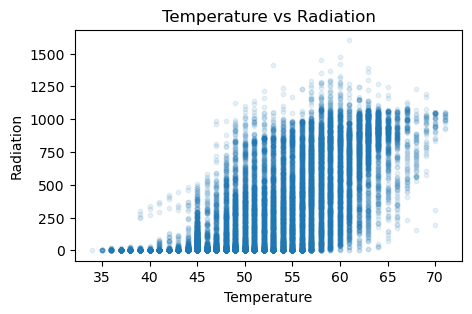

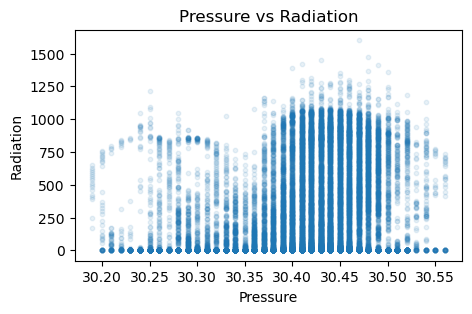

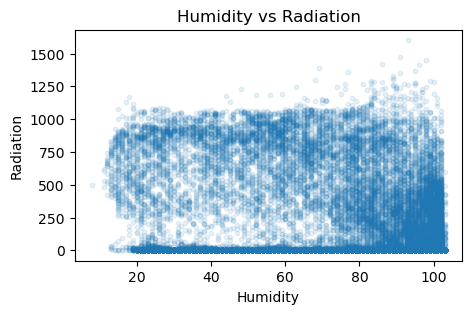

In [6]:
#ScatterPlot Temperature vs Radiation
df.plot.scatter('Temperature','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Temperature vs Radiation")
plt.show()

#ScatterPlot Pressure vs Radiation
df.plot.scatter('Pressure','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Pressure vs Radiation")
plt.show()

#ScatterPlot Humidity vs Radiation
df.plot.scatter('Humidity','Radiation',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.title("Humidity vs Radiation")
plt.show()

In [7]:
# Autocorrelation
# plt.figure(figsize=(10,3))

# pd.plotting.autocorrelation_plot(df1['Radiation'])
# plt.title("Radiation autocorrelation plot")
# #plt.tight_layout()
# plt.show()


# #Plot September Temperature in UNIXTime
# plt.figure(figsize=(8,3))
# plt.title("September Temp UNIXTime")
# plt.plot(df_sept["UNIXTime"], df_sept["Temperature"])
# plt.show

# 2. Splitting:

In [49]:
# Splitting into other and test (90% and 10%)

print("Train Test Split into Other and Test (90% and 10%):")


from sklearn.model_selection import train_test_split

X = df_clean.loc[:, df_clean.columns != 'Radiation']
y = df_clean['Radiation']

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

print("Other shape:", X_other.shape)
print("Test shape:", X_test.shape, "\n")

# Splitting "other" into train and validation using TimeSeriesSplit

from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5)

print("TimeSeriesSplit of Other into Train and Validation (5 Folds):")
fold = 0

for train_index, val_index in tss.split(X_other):
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]
    #print(np.unique(y_other, return_counts = True))
    fold = fold + 1
    print("Train Fold #", fold, X_train.shape, ";","Val Fold #", fold, X_val.shape)


Train Test Split into Other and Test (90% and 10%):
Other shape: (30364, 6)
Test shape: (3374, 6) 

TimeSeriesSplit of Other into Train and Validation (5 Folds):
Train Fold # 1 (5064, 6) ; Val Fold # 1 (5060, 6)
Train Fold # 2 (10124, 6) ; Val Fold # 2 (5060, 6)
Train Fold # 3 (15184, 6) ; Val Fold # 3 (5060, 6)
Train Fold # 4 (20244, 6) ; Val Fold # 4 (5060, 6)
Train Fold # 5 (25304, 6) ; Val Fold # 5 (5060, 6)


# 3. Preprocessing:

In [50]:
#Missing values
print('data dimensions:',X_train.shape)
perc_missing_per_ftr = X_train.isnull().sum(axis=0)/X_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(X_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(X_train.isnull().sum(axis=1)!=0)/X_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (25304, 6)
fraction of missing values in features:
Temperature               0.020787
Pressure                  0.020787
Humidity                  0.020787
WindDirection(Degrees)    0.020787
Speed                     0.020787
dtype: float64
data types of the features with missing values:
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
dtype: object
fraction of points with missing values: 0.020787227315839395


In [68]:
print(X_train.dtypes)
#Later I probably need to use OneHotEncoder for months (categorical, 1,2,3,4)

#Split up by month
#df_sep = df1['2016-09-01':'2016-09-30']
#df_oct = df1['2016-10-01':'2016-10-31']
#df_nov = df1['2016-11-01':'2016-10-30']
#df_dec = df1['2016-12-01':'2016-12-31']

UNIXTime                    int64
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
dtype: object


In [64]:
#Standard Encoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std_feats = ['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_feats)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
                                                       

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(25304, 6)
(25304, 6)
[[-1.80612974 -0.19262268 -0.26801871  1.09936896 -0.70081698  1.69591497]
 [-1.80599578 -0.19262268 -0.26801871  1.09936896  0.2708318   0.95503785]
 [-1.80559831 -0.19262268 -0.26801871  1.09936896  0.12540977  0.5829529 ]
 ...
 [ 1.71532453 -1.16832381 -0.57782312  0.723698    0.37466824  0.95503785]
 [ 1.71545672 -1.16832381 -0.57782312  0.723698    0.16980176  1.32383002]
 [ 1.71559069 -1.16832381 -0.57782312  0.723698    0.9784248  -0.89880133]]
